In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the zip file path in Google Drive
zip_path = "/content/drive/MyDrive/twitter_training.csv.zip"

# Unzip the dataset
extract_path = "twittercsvunzipped/content/dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully!")


Mounted at /content/drive
Dataset unzipped successfully!


In [ ]:
import glob

# Find CSV file in extracted path
csv_files = glob.glob(os.path.join(extract_path, "*.csv"))
print("CSV Files Found:", csv_files)

# Use the correct path
if csv_files:
    csv_path = csv_files[0]  # Take the first CSV found
else:
    raise FileNotFoundError("CSV file not found! Check the extracted folder.")

print("Using CSV file:", csv_path)


CSV Files Found: ['twittercsvunzipped/content/dataset/twitter_training.csv']
Using CSV file: twittercsvunzipped/content/dataset/twitter_training.csv


In [ ]:
#Corrected Code to Load the Dataset
import pandas as pd

# Update CSV path
csv_path = "twittercsvunzipped/content/dataset/twitter_training.csv"

# Load dataset (Check if headers exist)
df = pd.read_csv(csv_path, encoding="ISO-8859-1")

# Show first few rows
print(df.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [ ]:
#Updated Code to Fix Misalignment
import pandas as pd

# Update CSV path
csv_path = "twittercsvunzipped/content/dataset/twitter_training.csv"

# Define correct column names (Modify based on actual dataset structure)
columns = ["id", "entity", "label", "text"]  # Change this if needed

# Load dataset with correct column names
df = pd.read_csv(csv_path, names=columns, encoding="ISO-8859-1")

# Show first few rows
print(df.head())


     id       entity     label  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
#Check Dataset Structure
import pandas as pd

# Update CSV path
csv_path = "twittercsvunzipped/content/dataset/twitter_training.csv"

# Load dataset without column names first
df = pd.read_csv(csv_path, encoding="ISO-8859-1")

# Print dataset shape and first few rows
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (74681, 4)
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [ ]:
#Assign Correct Column Names
# Define column names (Modify based on the actual dataset structure)
columns = ["id", "entity", "label", "text"]  # Adjust based on Step 1 results

# Reload dataset with correct column names
df = pd.read_csv(csv_path, names=columns, encoding="ISO-8859-1")

# Print first few rows to verify column assignment
print(df.head())


     id       entity     label  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
#Keep Only Relevant Columns
# Keep only 'label' and 'text' columns
df = df[["label", "text"]]

# Convert labels to match Hugging Face format
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
df["label"] = df["label"].map(label_mapping)

# Drop any rows with missing labels
df = df.dropna()

# Save cleaned dataset to Google Drive
cleaned_csv_path = "/content/drive/My Drive/cleaned_twitter_dataset.csv"
df.to_csv(cleaned_csv_path, index=False)

print("✅ Dataset cleaned and saved at:", cleaned_csv_path)


✅ Dataset cleaned and saved at: /content/drive/My Drive/cleaned_twitter_dataset.csv


In [ ]:
!pip install transformers datasets torch scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Load the Cleaned Dataset
import pandas as pd
from datasets import Dataset

# Load the cleaned dataset
cleaned_csv_path = "/content/drive/My Drive/cleaned_twitter_dataset.csv"
df = pd.read_csv(cleaned_csv_path)

# Convert Pandas DataFrame to Hugging Face Dataset format
dataset = Dataset.from_pandas(df)

# Split dataset into train and test (80% train, 20% test)
dataset = dataset.train_test_split(test_size=0.2)

# Check dataset format
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 48896
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 12225
    })
})


In [ ]:
#Load Pretrained RoBERTa Model & Tokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load tokenizer & model
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#Tokenize the Text Data
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

# Apply tokenization to dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/48896 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/12225 [00:00<?, ? examples/s]

In [ ]:
#Update Tokenization

from datasets import load_dataset
from transformers import AutoTokenizer

# Load dataset
dataset = load_dataset("csv", data_files="/content/drive/My Drive/cleaned_twitter_dataset.csv")

# Load tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize with padding & truncation
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",  # Ensures all sequences have the same length
        truncation=True,       # Truncates sequences longer than model max length
        max_length=64          # You can set this to 128 or 256 if needed
    )

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "label"])


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/61121 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Load dataset
dataset = load_dataset("csv", data_files="/content/drive/My Drive/cleaned_twitter_dataset.csv")

# Convert dataset to Pandas DataFrame
df = dataset["train"].to_pandas()

# Split into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert back to Hugging Face dataset format
train_dataset = dataset["train"].from_pandas(train_df)
test_dataset = dataset["train"].from_pandas(test_df)


In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/My Drive/finetuned_roberta",
    eval_strategy="epoch",  # Fix: Use `eval_strategy` instead of `evaluation_strategy`
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10
)


In [ ]:
import torch
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split

# ✅ Step 1: Load and Clean Dataset
dataset = load_dataset("csv", data_files="/content/drive/My Drive/cleaned_twitter_dataset.csv")

# Convert dataset to Pandas DataFrame
df = dataset["train"].to_pandas()

# ✅ Step 2: Remove irrelevant columns and ensure correct format
df = df[["label", "text"]]  # Keep only necessary columns
df["label"] = df["label"].astype(int)  # Ensure label is an integer

# ✅ Step 3: Split into Train and Test Sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# ✅ Step 4: Convert back to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# ✅ Step 5: Load Tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# ✅ Step 6: Tokenize Dataset (WITHOUT one-hot encoding)
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=64
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# ✅ Step 7: Set Correct Format for Training
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# ✅ Step 8: Load Pretrained Model for Sentiment Classification
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# ✅ Step 9: Define Training Arguments
training_args = TrainingArguments(
    output_dir="/content/drive/My Drive/finetuned_roberta",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10
)

# ✅ Step 10: Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# ✅ Step 11: Start Fine-Tuning
trainer.train()


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/48896 [00:00<?, ? examples/s]

Map:   0%|          | 0/12225 [00:00<?, ? examples/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rutu4401 (rutu4401-sveri-s-college-of-engineering-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.576000,0.497343
2,0.413800,0.345601
3,0.172600,0.319543


TrainOutput(global_step=18336, training_loss=0.35850791972760154, metrics={'train_runtime': 2498.8431, 'train_samples_per_second': 58.702, 'train_steps_per_second': 7.338, 'total_flos': 4824447627460608.0, 'train_loss': 0.35850791972760154, 'epoch': 3.0})

In [ ]:
# ✅ Save the fine-tuned model
model_path = "/content/drive/My Drive/finetuned_roberta"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

print(f"✅ Fine-tuned model saved at: {model_path}")


✅ Fine-tuned model saved at: /content/drive/My Drive/finetuned_roberta


In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Zip the folder
shutil.make_archive("/content/finetuned_roberta", 'zip', "/content/drive/My Drive/finetuned_roberta")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/finetuned_roberta.zip'

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

# Load the fine-tuned model and tokenizer
model_name = "/content/drive/My Drive/finetuned_roberta"  # Change path if needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set model to evaluation mode
model.eval()

# Function to predict sentiment
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits  # Get raw model outputs (logits)

    probabilities = F.softmax(logits, dim=1)  # Convert to probabilities
    sentiment_class = torch.argmax(probabilities, dim=1).item()  # Get highest probability index

    # Map index to sentiment label
    sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}

    return sentiment_labels[sentiment_class], probabilities.numpy()

# Example usage:
text = "no one should vote."
sentiment, probs = predict_sentiment(text)
print(f"Sentiment: {sentiment}, Probabilities: {probs}")


Sentiment: Negative, Probabilities: [[9.9928892e-01 1.8728769e-04 5.2373693e-04]]


✅ Model Accuracy: 94.20%


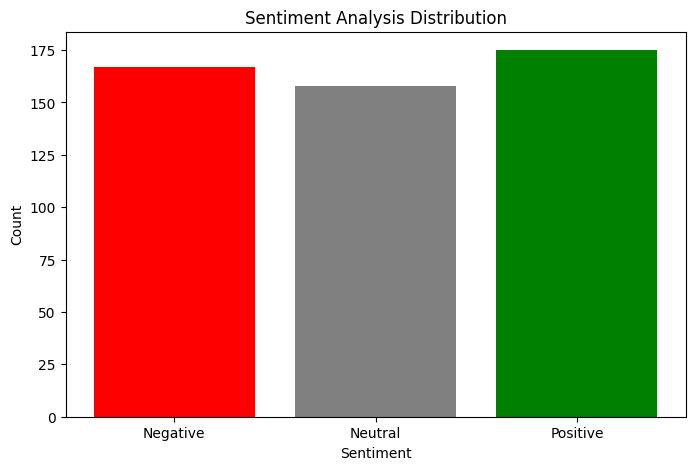

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score

# Load model and tokenizer
model_name = "/content/drive/My Drive/finetuned_roberta"  # Change if needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# Load test dataset
dataset = load_dataset("csv", data_files="/content/drive/My Drive/cleaned_twitter_dataset.csv")
df = dataset["train"].to_pandas()

# Take a small test sample (Modify size if needed)
test_df = df.sample(n=500, random_state=42)  # Test on 500 samples
true_labels = test_df["label"].tolist()  # True labels

# Function to predict sentiment
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    probabilities = F.softmax(logits, dim=1)  # Convert to probabilities
    sentiment_class = torch.argmax(probabilities, dim=1).item()  # Get predicted class

    return sentiment_class  # Return predicted label

# Predict sentiments for test data
test_df["predicted_label"] = test_df["text"].apply(predict_sentiment)

# Calculate accuracy
accuracy = accuracy_score(true_labels, test_df["predicted_label"])
print(f"✅ Model Accuracy: {accuracy*100:.2f}%")

# Plot sentiment distribution
sentiment_counts = test_df["predicted_label"].value_counts().sort_index()
sentiment_labels = ["Negative", "Neutral", "Positive"]

plt.figure(figsize=(8,5))
plt.bar(sentiment_labels, sentiment_counts, color=["red", "gray", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution")
plt.show()


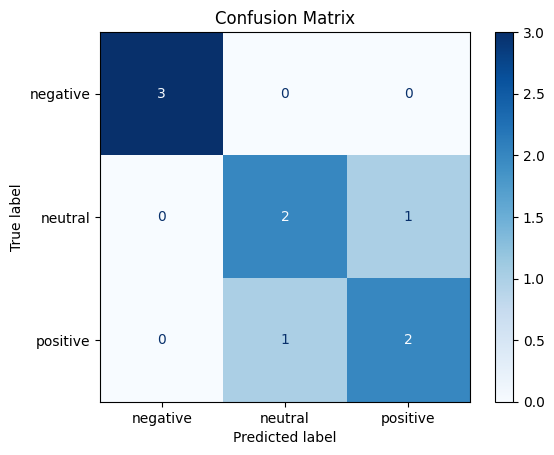

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: Set this based on your dataset
label_names = ["negative", "neutral", "positive"]

# Example ground truths and predictions
# These should come from your validation or test set
y_true = [0, 2, 1, 0, 2, 1, 1, 0, 2]   # Replace with actual labels
y_pred = [0, 2, 1, 0, 1, 1, 2, 0, 2]   # Replace with model predictions

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [2]:
pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl (12.9 MB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


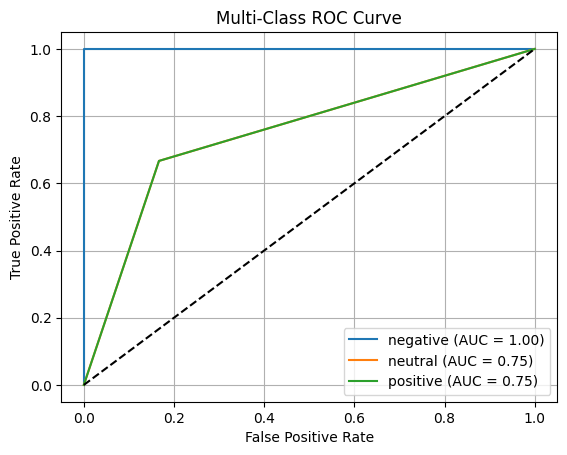

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assume 3 classes
label_names = ["negative", "neutral", "positive"]
y_true = [0, 2, 1, 0, 2, 1, 1, 0, 2]
y_pred = [0, 2, 1, 0, 1, 1, 2, 0, 2]

# Binarize labels for multiclass ROC
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Plot ROC
plt.figure()
for i, class_name in enumerate(label_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-Class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [3]:
pip install transformers datasets scikit-learn matplotlib


     -------------------------------------- 10.4/10.4 MB 575.3 kB/s eta 0:00:00
     -------------------------------------- 491.2/491.2 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 493.1 kB/s eta 0:00:00
     -------------------------------------- 481.4/481.4 kB 3.8 MB/s eta 0:00:00
     -------------------------------------- 162.0/162.0 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 274.1/274.1 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB ? eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 497.5 kB/s eta 0:00:00
     ------------------------------------ 308.9/308.9 kB 248.2 kB/s eta 0:00:00
     -------------------------------------- 78.5/78.5 kB 141.1 kB/s eta 0:00:00
     -------------------------------------- 25.3/25.3 MB 522.0 kB/s eta 0:00:00
     ------------------------------------ 116.3/116.3 kB 424.0 kB/s eta 0:00:00
  Using cached pandas-2.2.3-cp311-cp311-win_amd


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


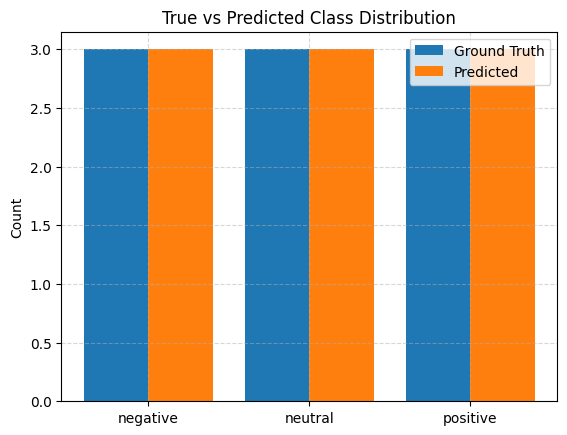

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

label_names = ["negative", "neutral", "positive"]
y_true = [0, 2, 1, 0, 2, 1, 1, 0, 2]
y_pred = [0, 2, 1, 0, 1, 1, 2, 0, 2]

true_counts = Counter(y_true)
pred_counts = Counter(y_pred)

x = range(len(label_names))
true_vals = [true_counts.get(i, 0) for i in x]
pred_vals = [pred_counts.get(i, 0) for i in x]

plt.bar(x, true_vals, width=0.4, label="Ground Truth", align='center')
plt.bar([i + 0.4 for i in x], pred_vals, width=0.4, label="Predicted", align='center')
plt.xticks([i + 0.2 for i in x], label_names)
plt.ylabel("Count")
plt.title("True vs Predicted Class Distribution")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


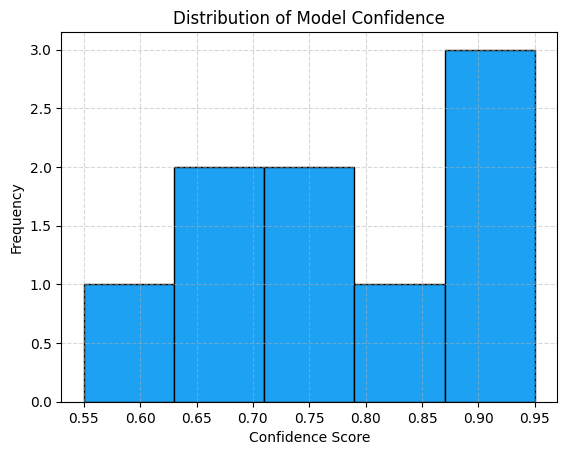

In [8]:
# Only if your model outputs probabilities
import numpy as np

# Fake example confidences
pred_confidences = [0.92, 0.67, 0.88, 0.71, 0.55, 0.95, 0.82, 0.77, 0.66]

plt.hist(pred_confidences, bins=5, color="#1DA1F2", edgecolor='black')
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.title("Distribution of Model Confidence")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
